In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

uniform_older_path = "../../output/5_2/uniform_output" 
normal_folder_path = "../../output/5_2/normal_output/" 
N_MAX = 40
K_MAX = 40

def extract_k_offset(file_name):
    parts = file_name.split("_")
    return int(parts[1])

def initialize_method_maps(methods):
    return {method: {} for method in methods}

def initialize_key_with_array(dictionary, key, length):
    if key not in dictionary:
        dictionary[key] = [float('nan')] * length

def populate_method_maps(df, N_to_K, K_to_N, k_offset):
    for i in range(0, df.shape[0]):
        for j in range(1, df.shape[1]):
            N = int(uniform_data.columns[j])
            K = N + k_offset
            if(K >= 0):
                initialize_key_with_array(K_to_N[i], K, N_MAX)
                initialize_key_with_array(N_to_K[i], N, K_MAX)
                K_to_N[i][K][N] = df.iloc[i, j]
                N_to_K[i][N][K] = df.iloc[i, j]
        
# methods = ["BCCE", "Air Top-K", "RadixSelect", "Bitonic Top-K", "BlockSelect"]
methods = [0, 1, 2, 3, 4]
K_to_N_uniform = initialize_method_maps(methods)
N_to_K_uniform = initialize_method_maps(methods)
K_to_N_normal = initialize_method_maps(methods)
N_to_K_normal = initialize_method_maps(methods)

for file_name in os.listdir(uniform_older_path):
    k_offset = extract_k_offset(file_name)
    file_path = os.path.join(uniform_older_path, file_name)
    uniform_data = pd.read_excel(file_path)
    populate_method_maps(uniform_data, N_to_K_uniform, K_to_N_uniform, k_offset)

for file_name in os.listdir(normal_folder_path):
    k_offset = extract_k_offset(file_name)
    file_path = os.path.join(normal_folder_path, file_name)
    normal_data = pd.read_excel(file_path)
    populate_method_maps(normal_data, N_to_K_normal, K_to_N_normal, k_offset)

../../output/5_2/uniform_output_v1/fixed_N_24_results.xlsx
../../output/5_2/uniform_output_v1/fixed_N_27_results.xlsx
../../output/5_2/uniform_output_v1/fixed_N_30_results.xlsx
../../output/5_2/normal_output_v1/fixed_N_24_results.xlsx
../../output/5_2/normal_output_v1/fixed_N_27_results.xlsx
../../output/5_2/normal_output_v1/fixed_N_30_results.xlsx


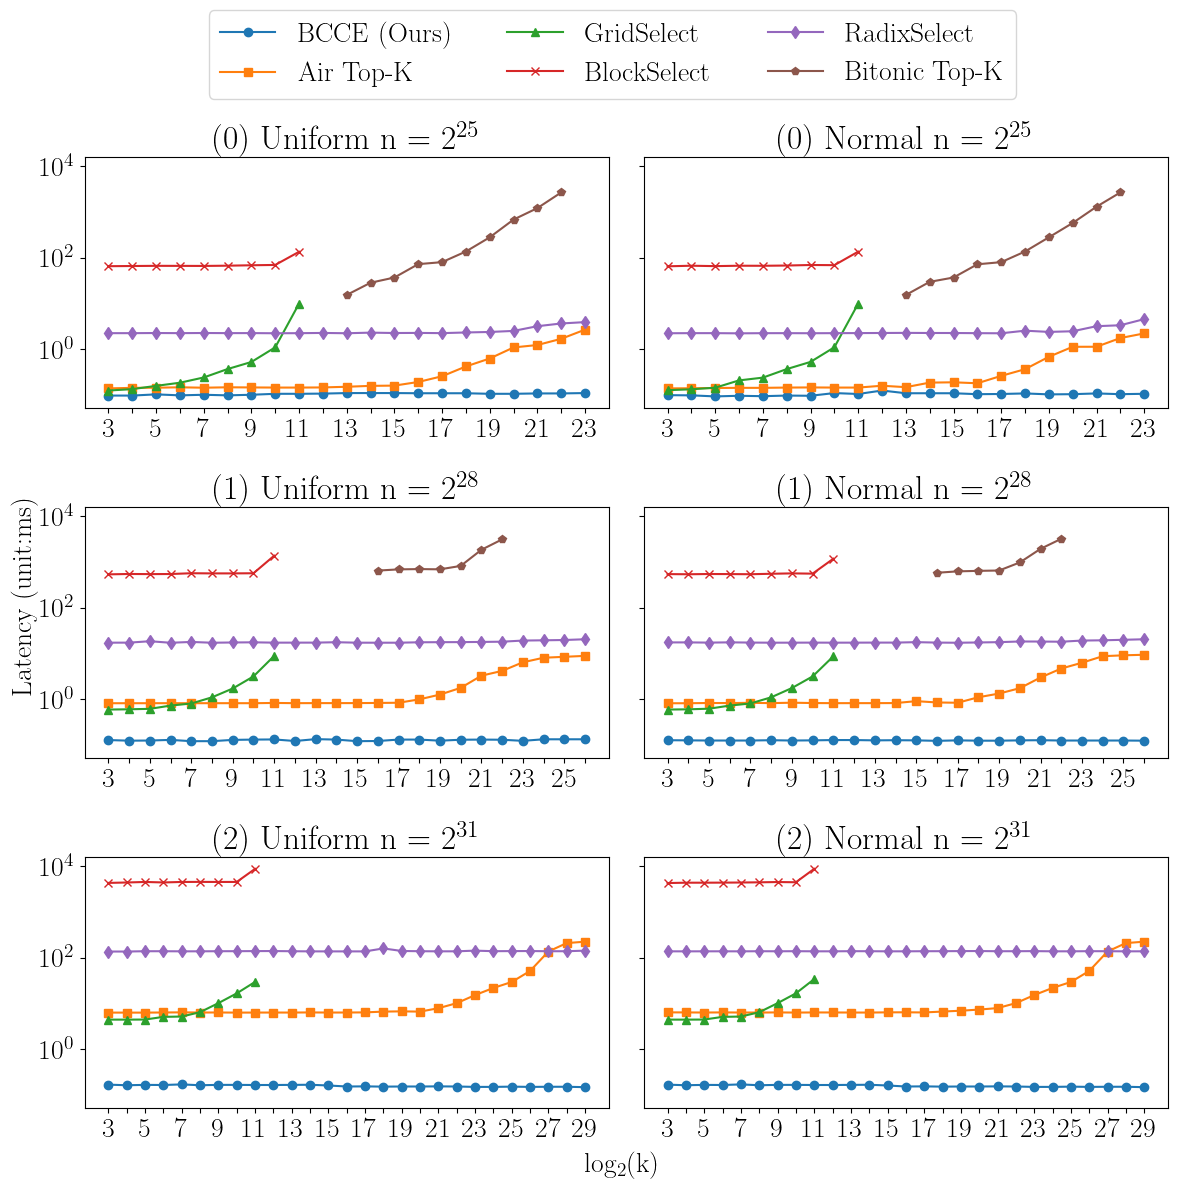

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 处理数据格式，去掉 "ms" 并转换为浮点数
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"] + rcParams["font.serif"]
rcParams["font.size"] = 20

def clean_data(df):
    df_cleaned = df.copy()
    for col in df.columns[1:]:  # 跳过第一列 Method
        df_cleaned[col] = df_cleaned[col].astype(str).str.replace("ms", "", regex=False).astype(float)
    return df_cleaned


N_values = [24, 27, 30]
# 绘制固定 k，变化 N 的图表
methods = ["BCCE (Ours)", "Air Top-K", "GridSelect", "BlockSelect", "RadixSelect", "Bitonic Top-K"]
markers = ["o", "s", "^", "x", "d", "p"]
fig, axes = plt.subplots(len(N_values), 2, figsize=(2 * 6, 12), sharey=True)

count=0
for dist in ["Uniform", " Normal"]:
    data = {}
    count = 0
    for idx, N_value in enumerate(N_values):
        file = ""
        if dist == "Uniform":
            file = f"../../output/5_2/uniform_output_v1/fixed_N_{N_value}_results.xlsx"
        else:
            file = f"../../output/5_2/normal_output_v1/fixed_N_{N_value}_results.xlsx"
        # get data
        df = pd.read_excel(file, sheet_name=None)
        data = df[list(df.keys())[0]]
        data = clean_data(data)
        print(file)
        query_scales = data.columns[1:].astype(str)
        ax = axes.flat[count * 2 if dist == "Uniform" else count * 2 + 1]
        for idx, row in data.iterrows():
            method = row.iloc[0]  # 方法名称
            times = row.iloc[1:].astype(float)  # 运行时间数据
            ax.plot(query_scales, times, marker=markers[idx], linestyle='-', label=methods[idx])

        ax.set_title(f"({count}) {dist} n = $2^{{{N_value + 1}}}$")
        ax.set_xticks(query_scales)
        labels = [label if i % 2 == 0 else "" for i, label in enumerate(query_scales)]
        ax.set_xticklabels(labels)
        ax.tick_params(axis="x")
        ax.set_yscale("log")
        ax.grid(False)
        count=count+1

# 在顶部添加统一图例
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=3, bbox_to_anchor=(0.86, 1))
fig.text(0.01, 0.5, "Latency (unit:ms)", va='center', rotation='vertical')
fig.text(0.52, 0.02, 'log$_2$(k)', ha='center')
plt.tight_layout(rect=[0.01, 0.02, 1, 0.92])
plt.savefig("5_2_1_new.pdf",  bbox_inches="tight")
plt.show()
plt.close()




In [ ]:

rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"
rcParams["font.serif"] = ["Times New Roman"] + rcParams["font.serif"]
rcParams["font.size"] = 14


# 绘制固定 k，变化 N 的图表
def plot_fixed_N(uniform_data, normal_data, n_values, k_range, output_file):
    methods = ["BCCE", "Air Top-K",  "BlockSelect", "RadixSelect", "Bitonic Top-K"]
    markers = ["o", "s", "^", "x", "d"]  # 不同方法的标记形状
    colors = ["blue", "green", "orange", "purple", "brown"]  # 不同方法的颜色

    # 创建子图
    fig, axes = plt.subplots(2, len(n_values), figsize=(4 * len(n_values), 2 * 4), sharey=True)
    print(n_values)
    count=0
    for dist in ["Uniform", " Normal"]:
        data = {}
        if dist == "Uniform":
            data = uniform_data
        else:
            data = normal_data
        for idx, n in enumerate(n_values):
            ax = axes.flat[count]
            for method_idx, method_name in enumerate(methods):
                method_uniform_data = uniform_data[method_idx]
                K_list = list(range(k_range[0], k_range[1] + 1))
                k_values = [
                    k
                    for k in K_list
                    if pd.notna(method_uniform_data[n][k]) and n > k
                ]
                if(method_idx == 0):
                    xticks = k_values
                times = [
                    float(str(method_uniform_data[n][k]).replace("ms", ""))
                    for k in K_list
                    if pd.notna(method_uniform_data[n][k]) and n > k
                ]
                ax.plot(k_values, times, label=method_name, marker=markers[method_idx], color=colors[method_idx], linewidth = 1)

            ax.set_title(f"({count}) {dist} N = $2^{{{n}}}$")
            ax.set_xticks(xticks)  # 设置 x 轴刻度
            ax.tick_params(axis="x", labelsize=12, rotation=90)  # 调整 x 轴刻度字体大小
            ax.set_yscale("log")
            ax.grid(False)  # 关闭网格线
            count=count+1

    # 在顶部添加统一图例
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels,ncol=5,bbox_to_anchor=(0.8,0.99),fontsize='large')
    
    fig.text(0.01, 0.5, "Running Time (unit:ms)", va='center', rotation='vertical',fontsize=16)
    fig.text(0.5, 0.02, r'$log_{2}(K)$', ha='center',fontsize=16)
    # plt.subplots_adjust(left=0.03, right=0.99, top=0.92, bottom=0.07, wspace=0.15, hspace=0.26)
    plt.tight_layout(rect=[0.01, 0.02, 1, 0.92])  # 调整布局为顶部图例留出空间
    plt.savefig(output_file)
    plt.close()

n_values = [22, 24, 26, 28, 30] # K 的取值
k_range = [10,30]  # N 的范围
plot_fixed_N(N_to_K_uniform, N_to_K_normal, n_values, k_range, "fixed_n_plot.pdf")



[22, 24, 26, 28, 30]
